<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/7/7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7.3 K-meansによるクラスタリング
- 目的
    - K-meansを用いたクラスタリングの実験を行う
    - どのような時に分類できないかを学ぶ
- 内容
    - 適切に分類できる場合
    - 外れ値の影響を受ける場合
    - クラスタ数を誤っている場合
    - データの形状が複雑な場合
- 参考
    - 本コードは以下のサイトを参考にしました
    - https://qiita.com/Yt330110713/items/534e1791aee4e1440785

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_moons

In [2]:
# データの作成、クラスタ数を3とする
K = 3
dataset = make_blobs(centers = K, random_state=1)
features = np.array(dataset[0])

# K-meansによるクラスタリング
clf = KMeans(n_clusters = K)
pred = clf.fit_predict(features)

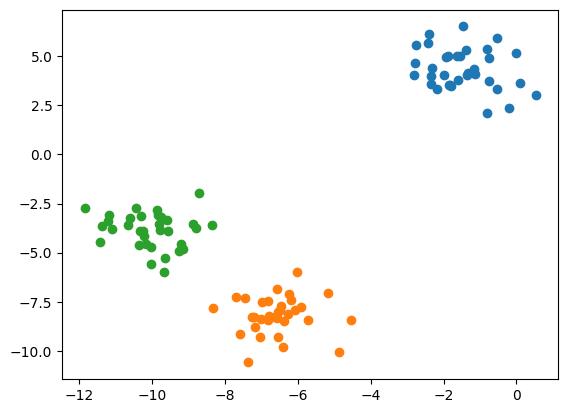

In [3]:
# クラスタリング結果の可視化
for i in range(K):
    labels = features[pred == i]
    plt.scatter(labels[:,0],labels[:,1])
plt.show()

In [4]:
# ノイズデータを追加して再度クラスタリング
NOISE = [25,25]
features = np.append(features, NOISE).reshape(-1,2)
pred = clf.fit_predict(features)

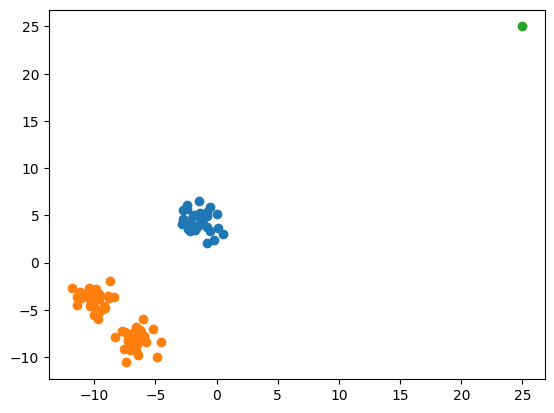

In [5]:
# クラスタリング結果の可視化
# 追加したノイズが一つのクラスタと判別されてしまう
for i in range(K):
    labels = features[pred == i]
    plt.scatter(labels[:,0],labels[:,1])
plt.show()

In [6]:
# データのクラスタ数を4、K-meansに与えるクラスタ数を3として実験
dataset = make_blobs(centers = K+1, random_state=6)
features = np.array(dataset[0])
pred = clf.fit_predict(features)

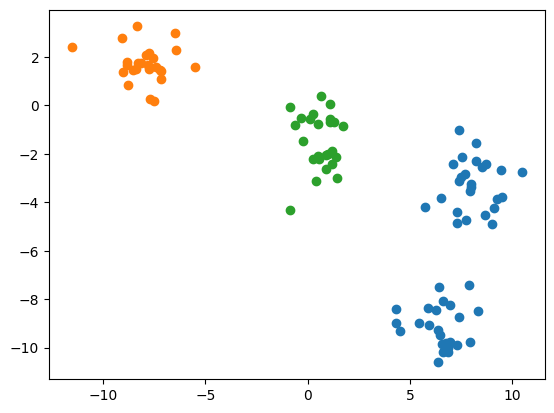

In [7]:
# むりやり3つに分離したため、２つのデータのまとまりを1つのクラスと見なしてしまう
for i in range(K):
    labels = features[pred == i]
    plt.scatter(labels[:,0],labels[:,1])
plt.show()

In [8]:
# 複雑な形状でのクラスタリング
X1,y1 = make_moons(noise = 0.05, random_state=0)

clf = KMeans(n_clusters = 2)
pred1 = clf.fit_predict(X1)

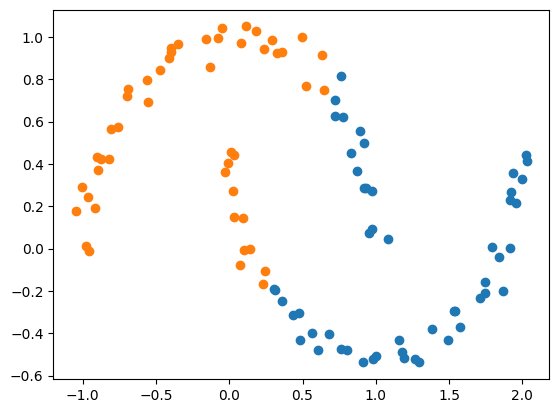

In [9]:
# K-meansではこのような形のクラスタリングができない
for i in range(2):
    labels = X1[pred1 == i]
    plt.scatter(labels[:,0],labels[:,1])

plt.show()